# 2. zadatak

In [ ]:
import tensorflow as tf
from tensorflow import keras

In [ ]:
(X_train, y_train), (X_test, y_test) = keras.datasets.cifar100.load_data(label_mode="fine")

In [ ]:
y_test = keras.utils.to_categorical(y_test, 100)
y_train = keras.utils.to_categorical(y_train, 100)

In [ ]:
X_train = X_train / 255
X_test = X_test / 255

In [ ]:
X_valid = X_train[:8000]
X_train = X_train[8000:]

y_valid = y_train[:8000]
y_train = y_train[8000:]

In [ ]:
model = keras.models.Sequential()

In [ ]:
model.add(keras.layers.Conv2D(32, (3,3), activation='relu', padding='same', input_shape=(32,32,3)))

In [ ]:
model.add(keras.layers.MaxPool2D(2,2))

In [ ]:
model.add(keras.layers.Dropout(0.3))

In [ ]:
model.add(keras.layers.Conv2D(256, (3,3), activation='relu', padding='same'))

In [ ]:
model.add(keras.layers.MaxPool2D(2,2))

In [ ]:
model.add(keras.layers.Dropout(0.2))

In [ ]:
model.add(keras.layers.Dense(512, activation='relu'))

In [ ]:
model.add(keras.layers.Dropout(0.5))

In [ ]:
model.add(keras.layers.Flatten())

In [ ]:
model.add(keras.layers.Dense(100, activation='softmax'))

In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 dropout_9 (Dropout)         (None, 16, 16, 32)        0         
                                                                 
 conv2d_7 (Conv2D)           (None, 16, 16, 256)       73984     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 8, 8, 256)        0         
 2D)                                                             
                                                                 
 dropout_10 (Dropout)        (None, 8, 8, 256)        

In [ ]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
povijest = model.fit(X_train, y_train, epochs=8, validation_data=(X_valid, y_valid))

Epoch 1/8
1313/1313 [==============================] - 21s 8ms/step - loss: 3.6321 - accuracy: 0.1597 - val_loss: 3.1080 - val_accuracy: 0.2545
Epoch 2/8
1313/1313 [==============================] - 9s 7ms/step - loss: 2.9214 - accuracy: 0.2843 - val_loss: 2.7831 - val_accuracy: 0.3169
Epoch 3/8
1313/1313 [==============================] - 9s 7ms/step - loss: 2.6034 - accuracy: 0.3482 - val_loss: 2.6608 - val_accuracy: 0.3361
Epoch 4/8
1313/1313 [==============================] - 9s 7ms/step - loss: 2.3690 - accuracy: 0.3988 - val_loss: 2.5865 - val_accuracy: 0.3562
Epoch 5/8
1313/1313 [==============================] - 9s 7ms/step - loss: 2.1704 - accuracy: 0.4394 - val_loss: 2.4714 - val_accuracy: 0.3799
Epoch 6/8
1313/1313 [==============================] - 9s 7ms/step - loss: 1.9993 - accuracy: 0.4747 - val_loss: 2.5157 - val_accuracy: 0.3790
Epoch 7/8
1313/1313 [==============================] - 9s 7ms/step - loss: 1.8539 - accuracy: 0.5058 - val_loss: 2.4261 - val_accuracy: 0.399

In [ ]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 2s 5ms/step - loss: 2.4155 - accuracy: 0.4091


[2.4155116081237793, 0.4090999960899353]

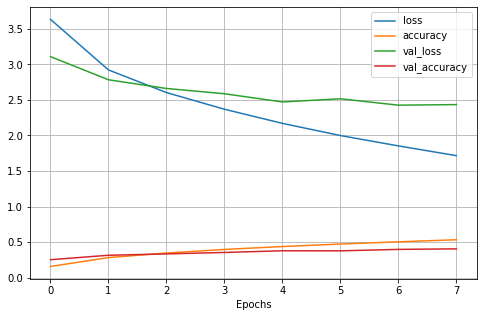

In [ ]:
import matplotlib.pyplot as plt
pd.DataFrame(povijest.history).plot(figsize=(8,5))
plt.xlabel('Epochs')
plt.grid()
plt.show()

In [ ]:
import numpy as np
y_pred = model.predict(X_test)
sortirano = np.argsort(y_pred)

In [ ]:
for i in range(8):
  print("Predviđeno: {}".format(np.argmax(y_pred[i])))

Predviđeno: 30
Predviđeno: 66
Predviđeno: 4
Predviđeno: 55
Predviđeno: 71
Predviđeno: 79
Predviđeno: 65
Predviđeno: 99
